In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math

Потсроим для начала модель многослойного перцептрона. Будем использовать датасет Mnist.

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
x_train_odd=x_train[:4000]
y_train_odd=y_train[:4000]

11490434/11490434 [==============================] - 0s 0us/step


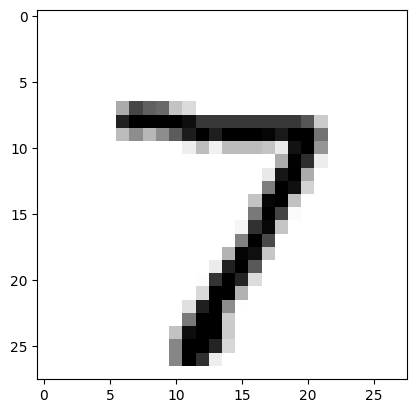

In [ ]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [ ]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=256,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=256,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=30,
    validation_data=(x_test_normalized, y_test)
)

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5542 - accuracy: 0.9260 - val_loss: 0.3089 - val_accuracy: 0.9565
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3017 - accuracy: 0.9542 - val_loss: 0.2768 - val_accuracy: 0.9587
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2590 - accuracy: 0.9612 - val_loss: 0.2435 - val_accuracy: 0.9640
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2378 - accuracy: 0.9632 - val_loss: 0.2163 - val_accuracy: 0.9663
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2210 - accuracy: 0.9653 - val_loss: 0.2285 - val_accuracy: 0.9613
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2135 - accuracy: 0.9656 - val_loss: 0.2223 - val_accuracy: 0.9610
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2048 - accuracy: 0.9668 - val_loss: 0.2172 - val_accuracy:

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [ ]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.1540612131357193
Training accuracy:  0.977316677570343


In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [ ]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.17382679879665375
Validation accuracy:  0.9707000255584717


Точность модели 97%, покажем первые 25 предсказаний, причем, если цифра угадана верно, то она будет зеленого цвета, иначе красного.

In [ ]:
predictions_one_hot = model.predict([x_test_normalized])
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)


313/313 [==============================] - 0s 1ms/step


,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


<ipython-input-21-df9b28cec665>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


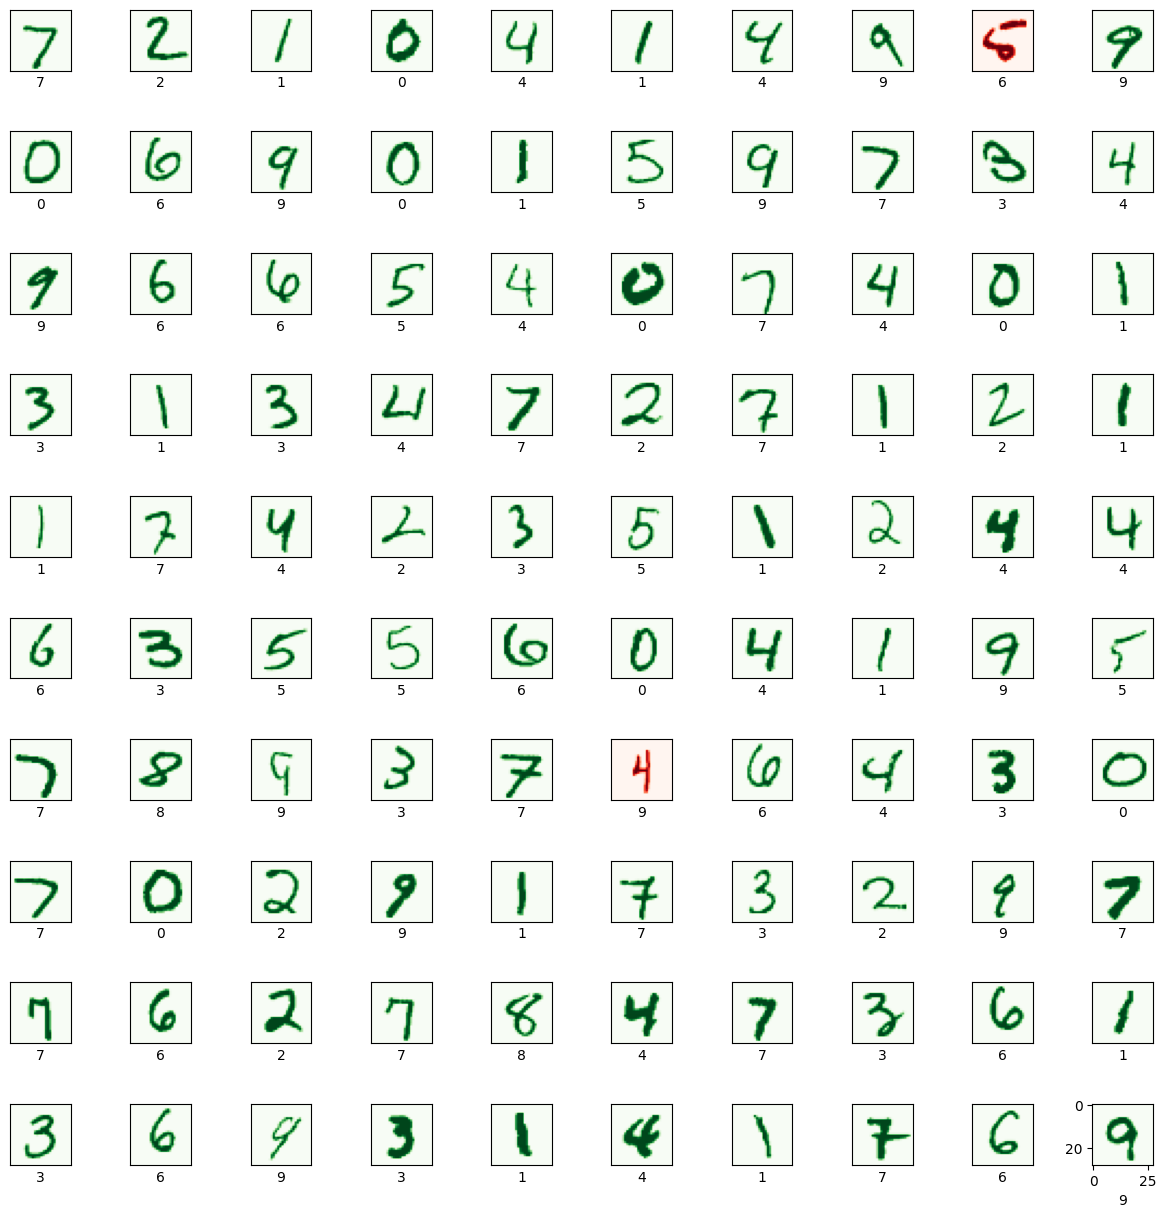

In [ ]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

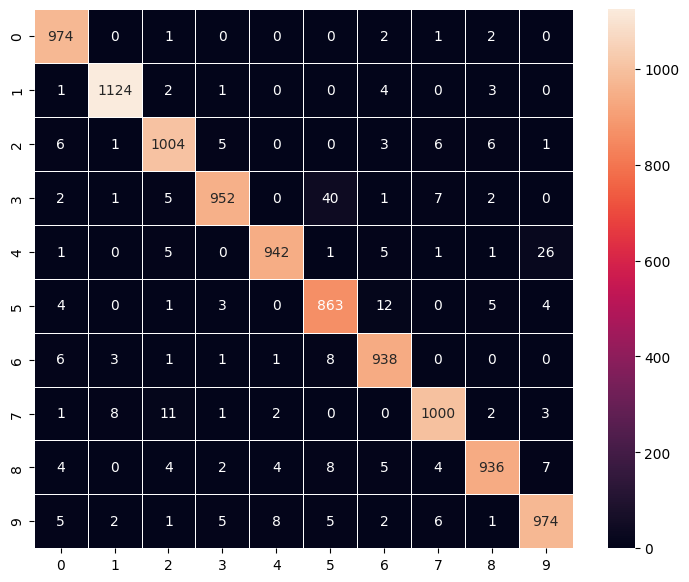

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Мы имеем досточно хороший результат, видно, что ошибок было достаточно мало.

Сделаем далее модели другие модели классификации, но на другом датасете.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder # масштабирование, кодирование
from sklearn.model_selection import train_test_split # деление на обучающую и тестовую
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.ensemble import RandomForestClassifier # классификатор случайного леса
from sklearn.linear_model import LogisticRegression # классификатор лог.регрессии
from sklearn.metrics import accuracy_score, confusion_matrix # метрики точности

In [ ]:
data = sns.load_dataset('mpg')
df = data.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


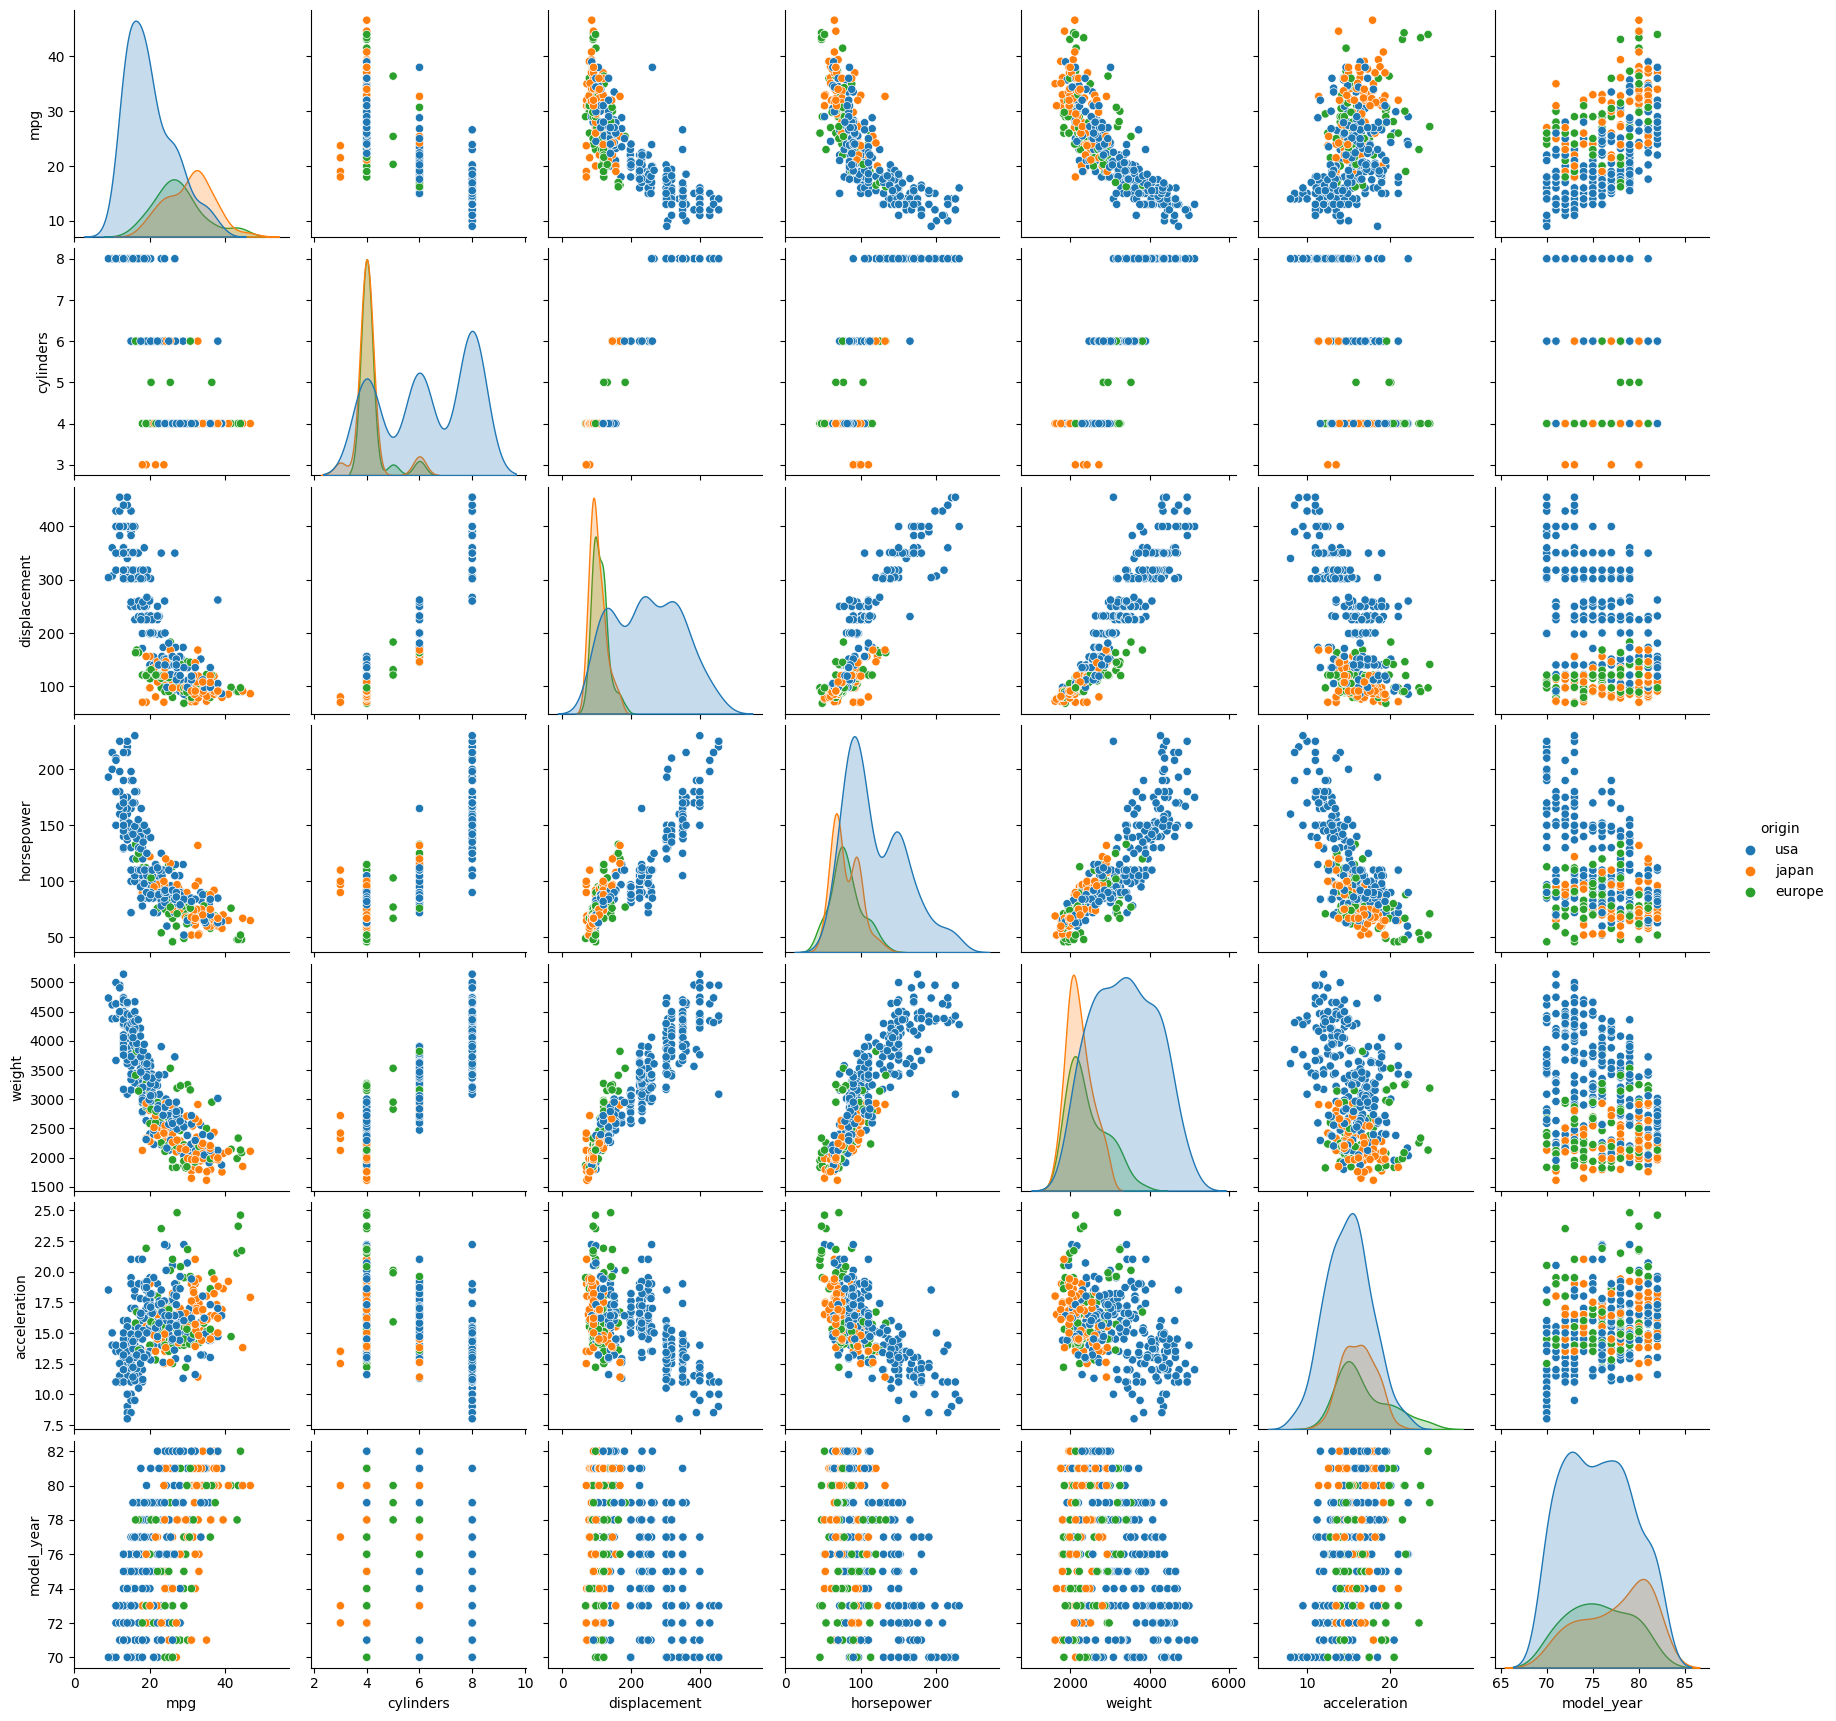

In [ ]:
sns.pairplot(data = df, hue = 'origin')

Мы хотим предсказать страну, в которой произведена машина по параметрам.

In [ ]:
X = df.iloc[:, 0:7].values
y0 = df.iloc[:, 7].values
y0

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y0)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1,
       0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test_0 = X_test

In [ ]:
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)
y_pred_LR = classifierLR.predict(X_test)
# Точность - Accuracy и матрица ошибок классификации
print(f'Точность :  {accuracy_score(y_test, y_pred_LR)}')
conf_mLR = confusion_matrix(y_test, y_pred_LR)
print('Матрица ошибок классификации')
print(conf_mLR)

Точность :  0.8354430379746836
Матрица ошибок классификации
[[ 5  4  2]
 [ 1 10  0]
 [ 3  3 51]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
classifierRF = RandomForestClassifier(max_depth=2, random_state=0)
classifierRF.fit(X_train, y_train)
y_pred_RF = classifierRF.predict(X_test)
# Точность - Accuracy и матрица ошибок классификации
print('Accuracy : ' + str(accuracy_score(y_test, y_pred_RF)))
conf_mRF = confusion_matrix(y_test, y_pred_RF)
print(conf_mRF)

Accuracy : 0.7721518987341772
[[ 3  7  1]
 [ 3  8  0]
 [ 2  5 50]]


Тут вероятно проблема в том, что данные необходимо нормально нормализовать, еще и скорее всего четкой зависимости от страны просто нет, ну или она минимальна. Например машины, произведенные в Европе легко угадываются, а вот между Японией и Сша небольшая разница.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [ ]:
from dateutil.rrule import YEARLY
Y = list(df['origin'])

In [ ]:
cluster_H = linkage(X, method='complete', metric='euclidean')

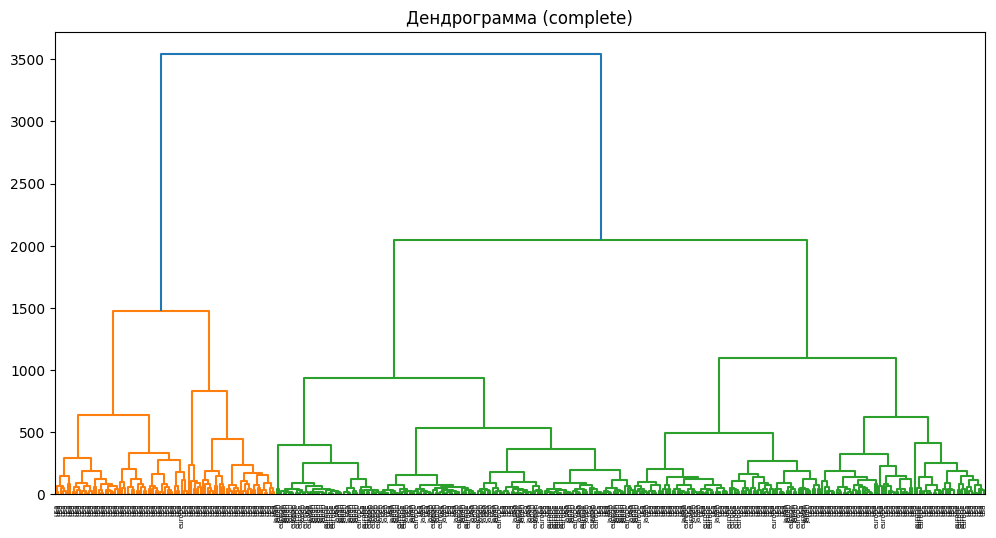

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(cluster_H,labels=Y,leaf_rotation=90)
plt.title ('Дендрограмма (сomplete)')
plt.show()

In [ ]:
cluster_A = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_A.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1,
       2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 0,
       0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2,

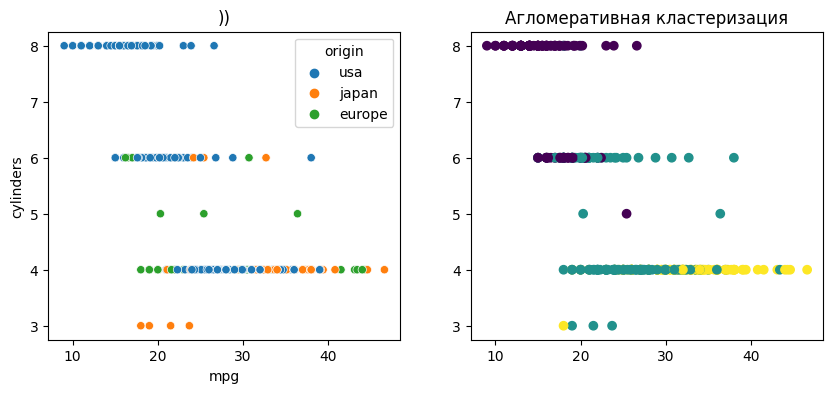

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1) # данные
sns.scatterplot(x='mpg', y='cylinders',hue='origin',data=df)
plt.title('))')
plt.subplot(1, 2, 2) # кластеризация
plt.scatter(X[:,0],X[:,1], c=cluster_A.labels_)
plt.title('Агломеративная кластеризация')
plt.show()

In [ ]:
model = KMeans(n_clusters=3)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
all_predictions = model.predict(X)
print(list(all_predictions))

[1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 

In [ ]:
car_predictions = df
car_predictions['predictions'] = list(all_predictions)
car_predictions.head()

<ipython-input-60-a2e23dfac5c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_predictions['predictions'] = list(all_predictions)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,predictions
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,2
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1


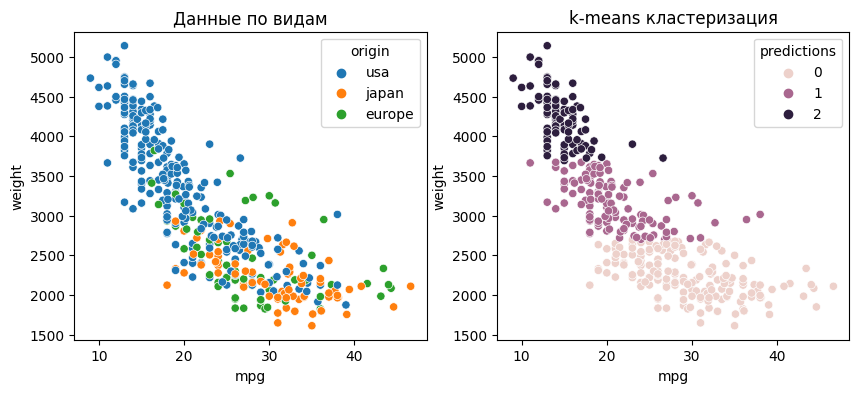

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1) # данные
sns.scatterplot(x='mpg', y='weight', hue='origin',data= df )
plt.title('Данные по видам')
plt.subplot(1, 2, 2) # кластеризация
sns.scatterplot(x='mpg', y='weight', hue='predictions', data=car_predictions)
plt.title('k-means кластеризация')
plt.show()

In [ ]:
WCSS = [] # инерция
for k_cl in range(1,6):
  kmeans = KMeans(n_clusters = k_cl, init='k-means++')
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)
print(WCSS)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[286994647.1202806, 72921054.22783464, 33849027.58547905, 18810933.856957808, 13500928.700180233]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


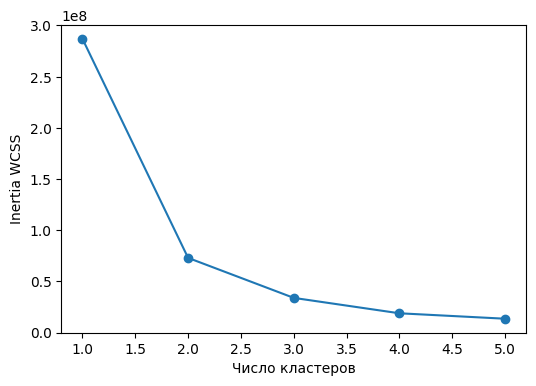

In [ ]:
frame = pd.DataFrame({'Cluster':range(1,6), 'WCSS':WCSS})
# каменистая осыпь
plt.figure(figsize=(6,4))
plt.plot(frame['Cluster'], frame['WCSS'], marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia WCSS')
plt.show()